In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations

In [20]:
df_food_scaled = pd.read_csv('df_food_scaled.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_14124\4074791732.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_scaled = pd.read_csv('df_food_scaled.csv')


In [21]:
nutrient_info = {
    'folate_eaten':                                         {'unit': 'mcg', 'target': 400,  'type': 'qualifying'},
    'niacin_eaten':                                         {'unit': 'mg',  'target': 14,   'type': 'qualifying'},
    'pantothenic_acid_eaten':                               {'unit': 'mg',  'target': 5,    'type': 'qualifying'},
    'vitamin_b2_eaten':                                     {'unit': 'mg',  'target': 1.1,  'type': 'qualifying'},
    'vitamin_b1_eaten':                                     {'unit': 'mg',  'target': 1.2,  'type': 'qualifying'},
    'all_trans_retinol_equivalents_activity_eaten':         {'unit': 'IU',  'target': 700,  'type': 'qualifying'},
    'beta_carotene_eaten':                                  {'unit' : 'mcg','target' : 700, 'type' :'qualifying'},
    'vitamin_b12_eaten':                                    {'unit': 'mcg', 'target': 2.4,  'type': 'qualifying'},
    'vitamin_b6_eaten':                                     {'unit': 'mg',  'target': 1.3,  'type': 'qualifying'},
    'vitamin_c_eaten':                                      {'unit': 'mg',  'target': 75,   'type': 'qualifying'},
    'vitamin_d_eaten':                                      {'unit': 'mcg', 'target': 7.5,  'type': 'qualifying'},
    'vitamin_e_activity_eaten':                             {'unit': 'TAE', 'target': 15,    'type': 'qualifying'},
    'calcium_eaten':                                        {'unit': 'mg',  'target': 1000, 'type': 'qualifying'},
    'iron_eaten':                                           {'unit': 'mg',  'target': 18,   'type': 'qualifying'},
    'magnesium_eaten':                                      {'unit': 'mg',  'target': 320,  'type': 'qualifying'},
    'phosphorus_eaten':                                     {'unit': 'mg',  'target': 700,  'type': 'qualifying'},
    'potassium_eaten':                                      {'unit': 'mg',  'target': 4700, 'type': 'qualifying'},
    'zinc_eaten':                                           {'unit': 'mg',  'target': 8,    'type': 'qualifying'},
    'fiber_eaten':                                          {'unit': 'g',   'target': 25,   'type': 'qualifying'},
    'protein_eaten':                                        {'unit': 'g',   'target': 46,   'type': 'qualifying'},
    'fat_eaten':                                            {'unit': 'g',   'target': 78,   'type': 'disqualifying'},
    'fatty_acids_saturated_eaten':                          {'unit': 'g',   'target': 22,   'type': 'disqualifying'},
    'cholesterol_eaten':                                    {'unit': 'mg',  'target': 300,  'type': 'disqualifying'},
    'sugar_eaten':                                          {'unit': 'g',   'target': 125,  'type': 'disqualifying'},
    'sodium_eaten':                                         {'unit': 'mg',  'target': 2400, 'type': 'disqualifying'},
    'salt_eaten' :                                          {'unit' : 'g',  'target': 6,   'type': 'disqualifying'}
}


conversion_factors = {
    "mg": 1000,
    "g": 1,
    "mcg": 1000000,
    "IU": 1,
    "TAE": 1,
}

In [22]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [23]:
df_food_scaled = pd.read_csv('df_food_scaled.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_14124\4074791732.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_scaled = pd.read_csv('df_food_scaled.csv')


In [24]:
df_fruits = df_food_scaled[df_food_scaled['food_group'] == 'fruits']
df_fruits.drop_duplicates('combined_name')[['combined_name', 'QI', 'DI', 'NB']].sort_values('QI', ascending=False)

,combined_name,QI,DI,NB
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,0.568540,56.568098
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,0.600302,54.023968
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,0.580539,54.494243
305671,Fruchtmus Apfel & Ananas,138.859468,0.597358,52.640407
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,0.605089,52.713598
...,...,...,...,...
316383,Freshona - Bio Fruchtpüree (Apfel und Birne),0.014493,0.527902,1.449275
312233,Sweet Valley - Apfelmus,0.013256,0.604156,1.325557
311110,"McEnnedy - Cranberries, sweetened and dried",0.003225,0.578659,0.322539
315750,Migros - Getrocknete Aronia Beeren,0.002865,0.014694,0.286533


In [25]:
high_qi_fruits = df_fruits[df_fruits['QI'] > 10].drop_duplicates('combined_name').sort_values('QI', ascending=False)
high_qi_fruits[['combined_name', 'QI', 'DI', 'NB']]

,combined_name,QI,DI,NB
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,0.568540,56.568098
294021,Andros - Apfel,162.495122,0.585561,55.643029
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,0.600302,54.023968
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,0.580539,54.494243
305671,Fruchtmus Apfel & Ananas,138.859468,0.597358,52.640407
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,0.605089,52.713598
282079,M Classic Apple and banana compote,123.198757,0.672782,51.700641
299414,M-Classic Applesauce without added sugar,117.478547,0.723782,50.595394
273759,Fruit compotes,74.859202,0.562213,44.362794


In [26]:
ratio_cols = [i for i in high_qi_fruits.columns if '_ratio_scaled' in i]

df_corr = high_qi_fruits[ratio_cols + ['QI']]
corr = df_corr.corr()['QI']
corr.sort_values(ascending=True)

salt_eaten_ratio_scaled                                     -0.822902
fatty_acids_saturated_eaten_ratio_scaled                    -0.356669
fat_eaten_ratio_scaled                                       0.233490
sugar_eaten_ratio_scaled                                     0.374961
protein_eaten_ratio_scaled                                   0.589904
fiber_eaten_ratio_scaled                                     0.880002
vitamin_c_eaten_ratio_scaled                                 0.960732
phosphorus_eaten_ratio_scaled                                1.000000
vitamin_b2_eaten_ratio_scaled                                1.000000
niacin_eaten_ratio_scaled                                    1.000000
folate_eaten_ratio_scaled                                    1.000000
zinc_eaten_ratio_scaled                                      1.000000
iron_eaten_ratio_scaled                                      1.000000
magnesium_eaten_ratio_scaled                                 1.000000
vitamin_b6_eaten_rat

In [27]:
def compute_index(row, nutrient_cols, scaling_factor=2000) :

    index = 0
    ratio_sum = 0

    for nutr in nutrient_cols :
        ratio_sum += row[nutr + '_ratio']

    index = (scaling_factor / row['energy_kcal_eaten']) * (ratio_sum / len(nutrient_cols))
    return index

In [28]:
def compute_qi_excluding(row, nutrient_list, exclude=None, scaling_factor=2000):
    if exclude is not None:
        new_list = [nutr for nutr in nutrient_list if nutr != exclude]
    else:
        new_list = nutrient_list
    

    return compute_index(row, new_list, scaling_factor=scaling_factor)

In [58]:
def compare_qi_excluding_nutrient(df, nutrient_to_exclude, qualifying_nutrients, new_col_name=None,scaling_factor=2000):


    if new_col_name is None:
        new_col_name = f"QI_excl_{nutrient_to_exclude}"


    df[new_col_name] = df.apply(lambda row: compute_qi_excluding(row, qualifying_nutrients, exclude=nutrient_to_exclude, scaling_factor=scaling_factor), axis=1)

 
    df_plot = df.drop_duplicates('combined_name').copy()
    df_plot = df_plot[['combined_name', 'QI', new_col_name]]

    labels = df_plot['combined_name'].tolist()
    x = np.arange(len(labels))
    width = 0.35


    plt.figure(figsize=(16, 8))
    plt.bar(x - width/2, df_plot['QI'], width, label='QI (incl. ' + nutrient_to_exclude + ')', color='skyblue')
    plt.bar(x + width/2, df_plot[new_col_name], width, label=f"QI (excl. {nutrient_to_exclude})", color='deeppink')

    plt.xlabel('Food Item')
    plt.ylabel('QI Value')
    plt.title(f"Comparison of QI with and without {nutrient_to_exclude}")
    plt.xticks(x, labels, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_plot['QI_diff'] = df_plot['QI'] - df_plot[new_col_name]
    df_plot['QI_pct_change'] = (df_plot['QI_diff'] / df_plot['QI']) * 100

    return df_plot

In [60]:
def compute_qi_excluding_multiple(row, nutrient_list, exclude_list, scaling_factor=2000):

    new_list = nutrient_list.copy()  

    for nutr in exclude_list:
        if nutr in new_list:
            new_list.remove(nutr)

    return compute_index(row, new_list, scaling_factor=scaling_factor)

In [61]:
def plot_nutrient_contributions_with_qi(row, nutrient_cols, exclude_list=None, scaling_factor=2000):

    if exclude_list is not None:
        included_nutrients = [nutr for nutr in nutrient_cols if nutr not in exclude_list]
    else:
        included_nutrients = nutrient_cols

    qi_value = compute_index(row, included_nutrients, scaling_factor=scaling_factor)
    
    ratio_cols = [nutr + '_ratio_scaled' for nutr in included_nutrients]

    values = row[ratio_cols]
    
    plt.figure(figsize=(14, 6))
    bars = plt.bar(ratio_cols, values, color='skyblue', edgecolor='skyblue')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.05 * max(values),
                 f"{height:.2f}", ha='center', va='bottom', fontsize=8)
    
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Scaled Nutrient Ratio")
    
 
    if exclude_list is None:
        title_str = f"Nutrient Contributions for {row['combined_name']} \n(QI = {qi_value:.2f})\n"
    else:
        title_str = (f"Nutrient Contributions for {row['combined_name']} \n(Excluding {', '.join(exclude_list)})\n"f"QI = {qi_value:.2f}\n")
    
    plt.title(title_str)
    plt.tight_layout()
    plt.show()

## Vitamin b2

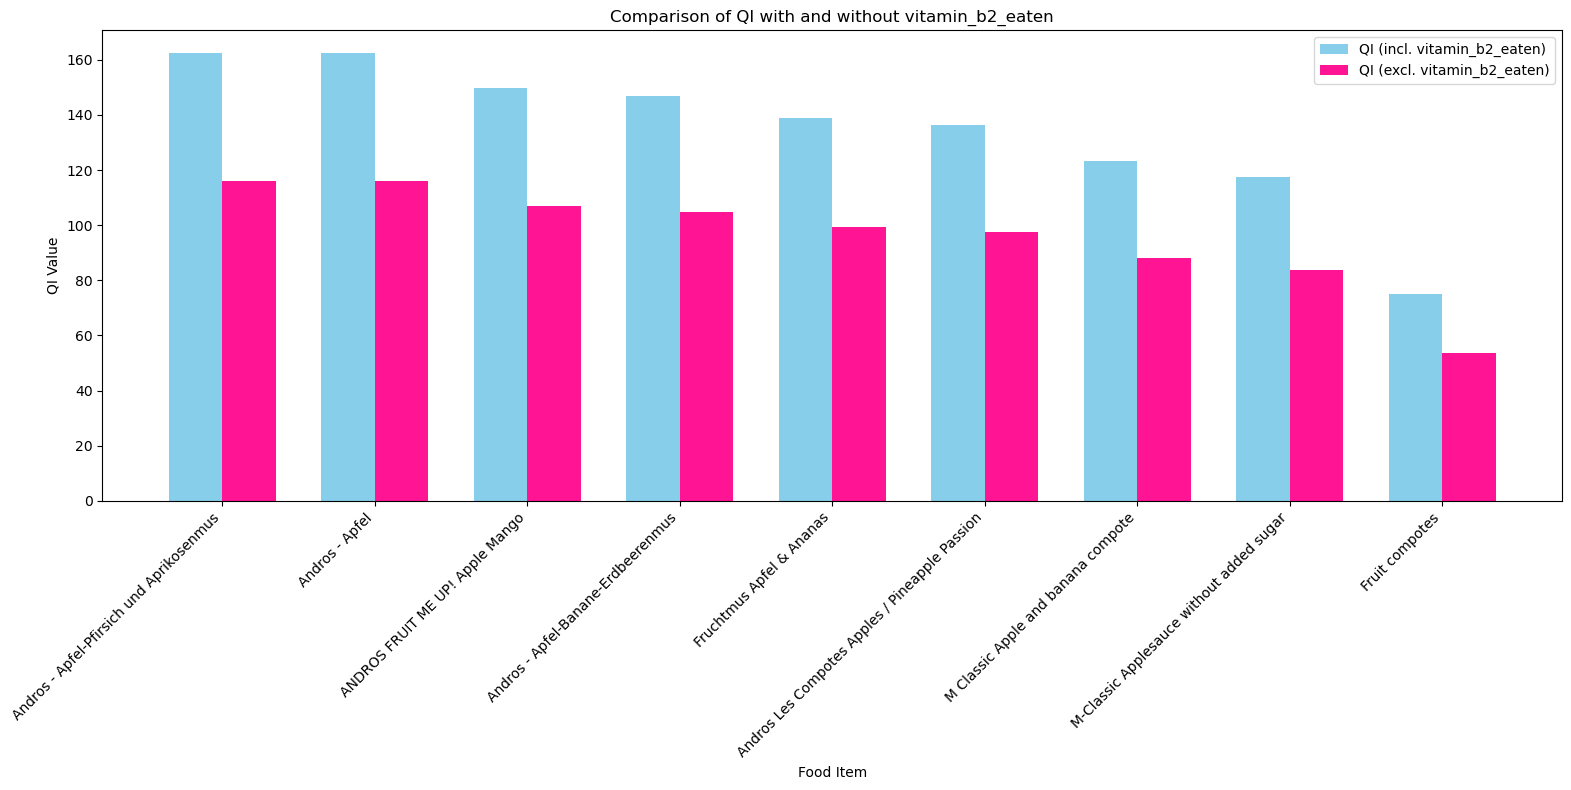

,combined_name,QI,QI_excl_vitamin_b2_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,116.102130,46.419265,28.561941
294021,Andros - Apfel,162.495122,116.074475,46.420648,28.567410
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,106.937571,42.781464,28.574499
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,104.946560,41.955469,28.560170
305671,Fruchtmus Apfel & Ananas,138.859468,99.190915,39.668553,28.567410
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,97.383635,38.961987,28.575899
282079,M Classic Apple and banana compote,123.198757,88.009804,35.188953,28.562750
299414,M-Classic Applesauce without added sugar,117.478547,83.911904,33.566643,28.572572
273759,Fruit compotes,74.859202,53.468453,21.390748,28.574641


In [44]:
df_fruit_vitamin_b2 = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='vitamin_b2_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_vitamin_b2

## Vitamin b1

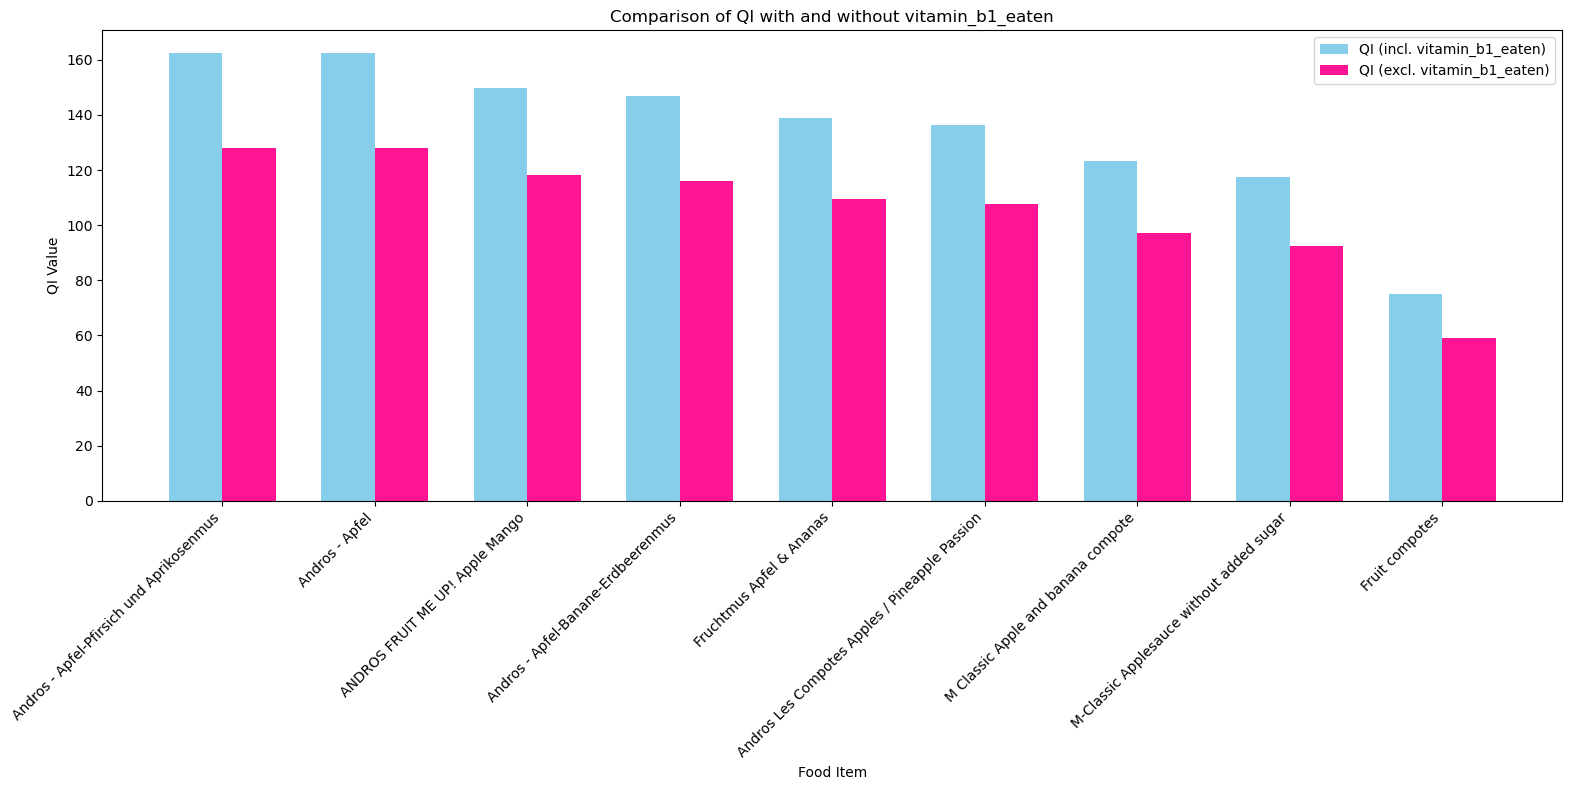

,combined_name,QI,QI_excl_vitamin_b1_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,128.148687,34.372707,21.149651
294021,Andros - Apfel,162.495122,128.121032,34.374090,21.153921
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,118.039300,31.679734,21.159457
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,115.834795,31.067235,21.148268
305671,Fruchtmus Apfel & Ananas,138.859468,109.485246,29.374223,21.153921
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,107.494138,28.851484,21.160550
282079,M Classic Apple and banana compote,123.198757,97.141872,26.056885,21.150282
299414,M-Classic Applesauce without added sugar,117.478547,92.622492,24.856055,21.157952
273759,Fruit compotes,74.859202,59.019318,15.839884,21.159568


In [45]:
df_fruit_vitamin_b1 = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='vitamin_b1_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_vitamin_b1

## Vitamin b6

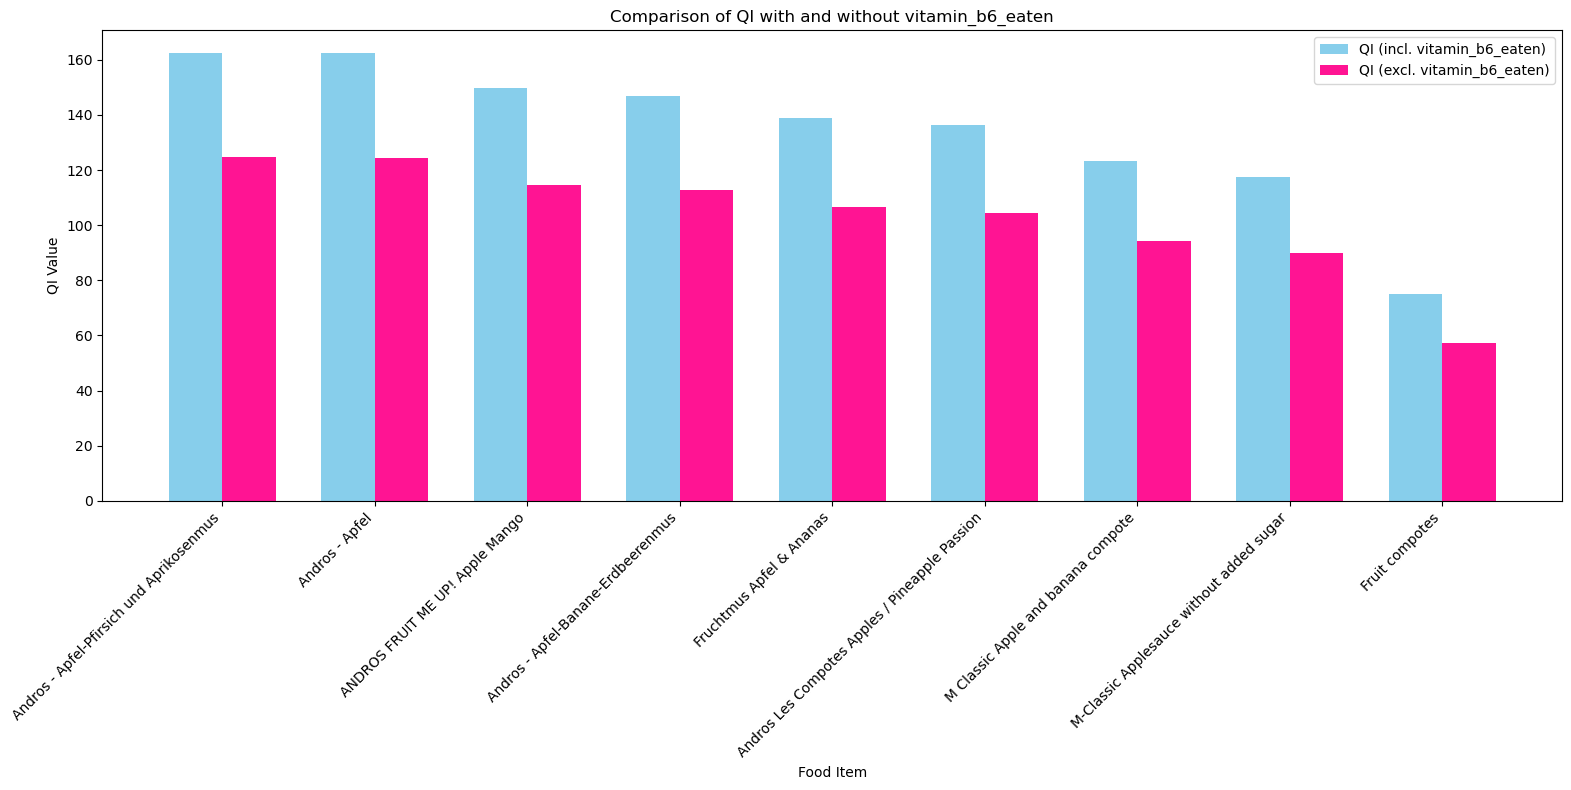

,combined_name,QI,QI_excl_vitamin_b6_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,124.559518,37.961877,23.358080
294021,Andros - Apfel,162.495122,124.531863,37.963260,23.362707
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,114.731634,34.987400,23.368705
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,112.590738,34.311291,23.356581
305671,Fruchtmus Apfel & Ananas,138.859468,106.418137,32.441331,23.362707
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,104.481800,31.863822,23.369890
282079,M Classic Apple and banana compote,123.198757,94.421050,28.777707,23.358764
299414,M-Classic Applesauce without added sugar,117.478547,90.027246,27.451300,23.367075
273759,Fruit compotes,74.859202,57.365485,17.493717,23.368826


In [46]:
df_fruit_vitamin_b6 = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='vitamin_b6_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_vitamin_b6

## Pantothenic acid

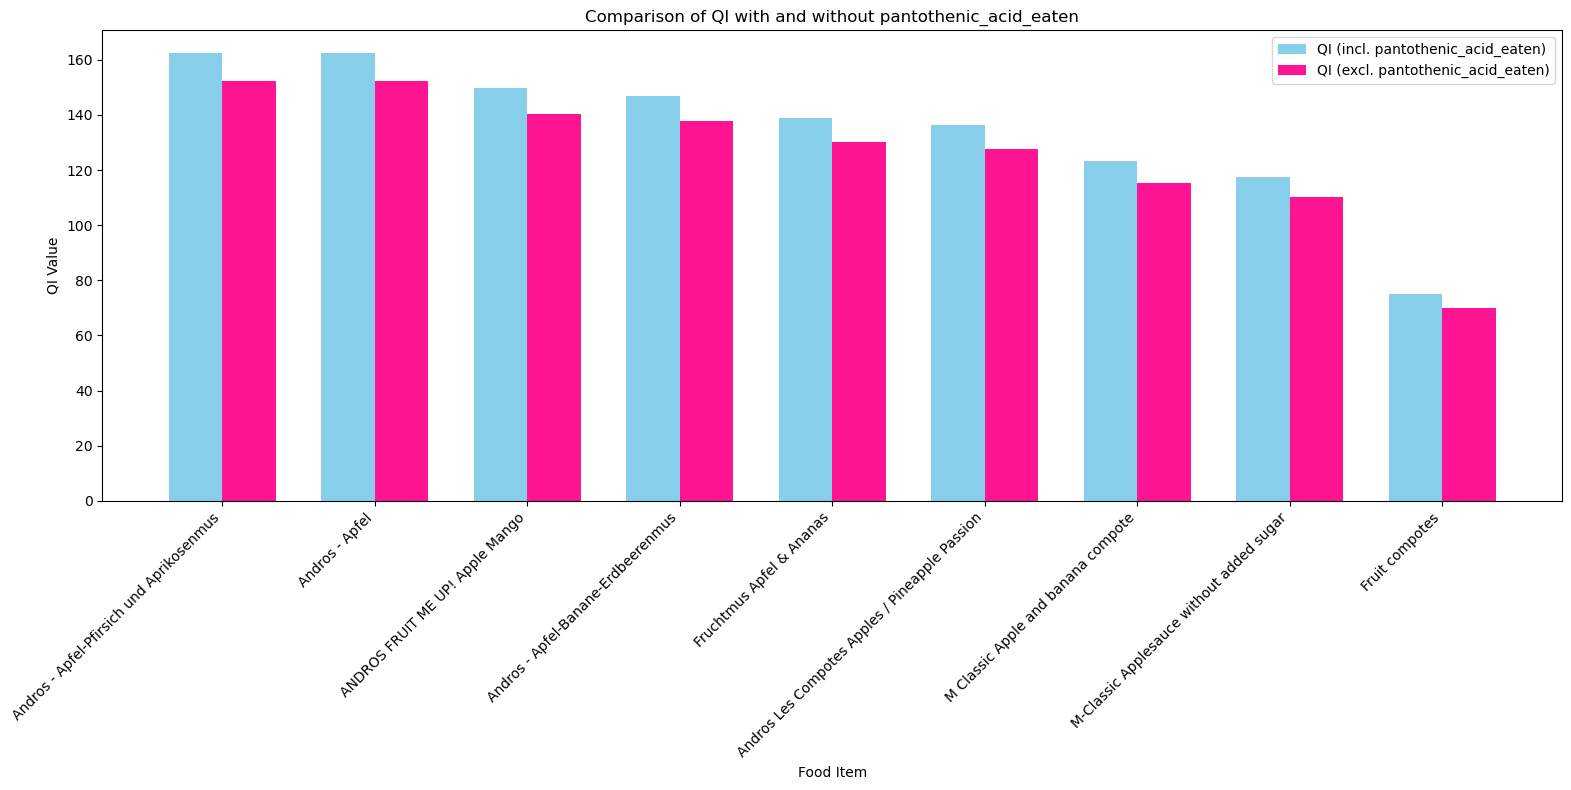

,combined_name,QI,QI_excl_pantothenic_acid_eaten,QI_diff,QI_pct_change
306121,Andros - Apfel-Pfirsich und Aprikosenmus,162.521394,152.262162,10.259232,6.312543
294021,Andros - Apfel,162.495122,152.234507,10.260615,6.314414
294314,ANDROS FRUIT ME UP! Apple Mango,149.719034,140.261522,9.457512,6.316840
306117,Andros - Apfel-Banane-Erdbeerenmus,146.902030,137.629667,9.272363,6.311936
305671,Fruchtmus Apfel & Ananas,138.859468,130.091306,8.768162,6.314414
290379,Andros Les Compotes Apples / Pineapple Passion,136.345622,127.732233,8.613388,6.317319
282079,M Classic Apple and banana compote,123.198757,115.421442,7.777315,6.312819
299414,M-Classic Applesauce without added sugar,117.478547,110.058389,7.420157,6.316181
273759,Fruit compotes,74.859202,70.130429,4.728773,6.316889


In [53]:
df_fruit_pantothenic_acid = compare_qi_excluding_nutrient(df=high_qi_fruits, nutrient_to_exclude='pantothenic_acid_eaten', qualifying_nutrients=qualifying_nutrients)

df_fruit_pantothenic_acid

In [78]:
exclude_list = ['vitamin_b1_eaten', 'vitamin_b2_eaten', 'vitamin_b6_eaten', 'pantothenic_acid_eaten']
qualifying_nutrients = list(nutrient_info.keys())

for idx, row in high_qi_fruits.iterrows():

    qi_incl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list=[])
    qi_excl = compute_qi_excluding_multiple(row, qualifying_nutrients, exclude_list=exclude_list)

    print(f"Food: {row['combined_name']}")
    print(f"QI (incl. all): {qi_incl}")
    print(f"QI (excl. {', '.join(exclude_list)}): {qi_excl}")
    print("-----------")


Food: Andros - Apfel-Pfirsich und Aprikosenmus
QI (incl. all): 125.14765872232877
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 6.932045450659347
-----------
Food: Andros - Apfel
QI (incl. all): 125.1313775012372
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 6.912804007551113
-----------
Food: ANDROS FRUIT ME UP! Apple Mango
QI (incl. all): 115.30701916219904
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 6.358648347925092
-----------
Food: Andros - Apfel-Banane-Erdbeerenmus
QI (incl. all): 113.13553177417589
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 6.290677444040004
-----------
Food: Fruchtmus Apfel & Ananas
QI (incl. all): 106.95282748707122
QI (excl. vitamin_b1_eaten, vitamin_b2_eaten, vitamin_b6_eaten, pantothenic_acid_eaten): 5.93375152380814
-----------
Food: Andros Les Compotes Apples / Pineapple Passion
Q